In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os

import analysis

In [2]:
cfgbase = 'cl3_16_48_b6p1_m0p2450'
job_num = 11504
# cfgbase = 'su3_24_48_b6p10050'
# job_num = 172
base = './output/' + cfgbase + '_' + str(job_num)

C = analysis.read_h5(base, mom = True)    # C should be a dictionary whose keys are the momentum slices.

<IPython.core.display.Javascript object>


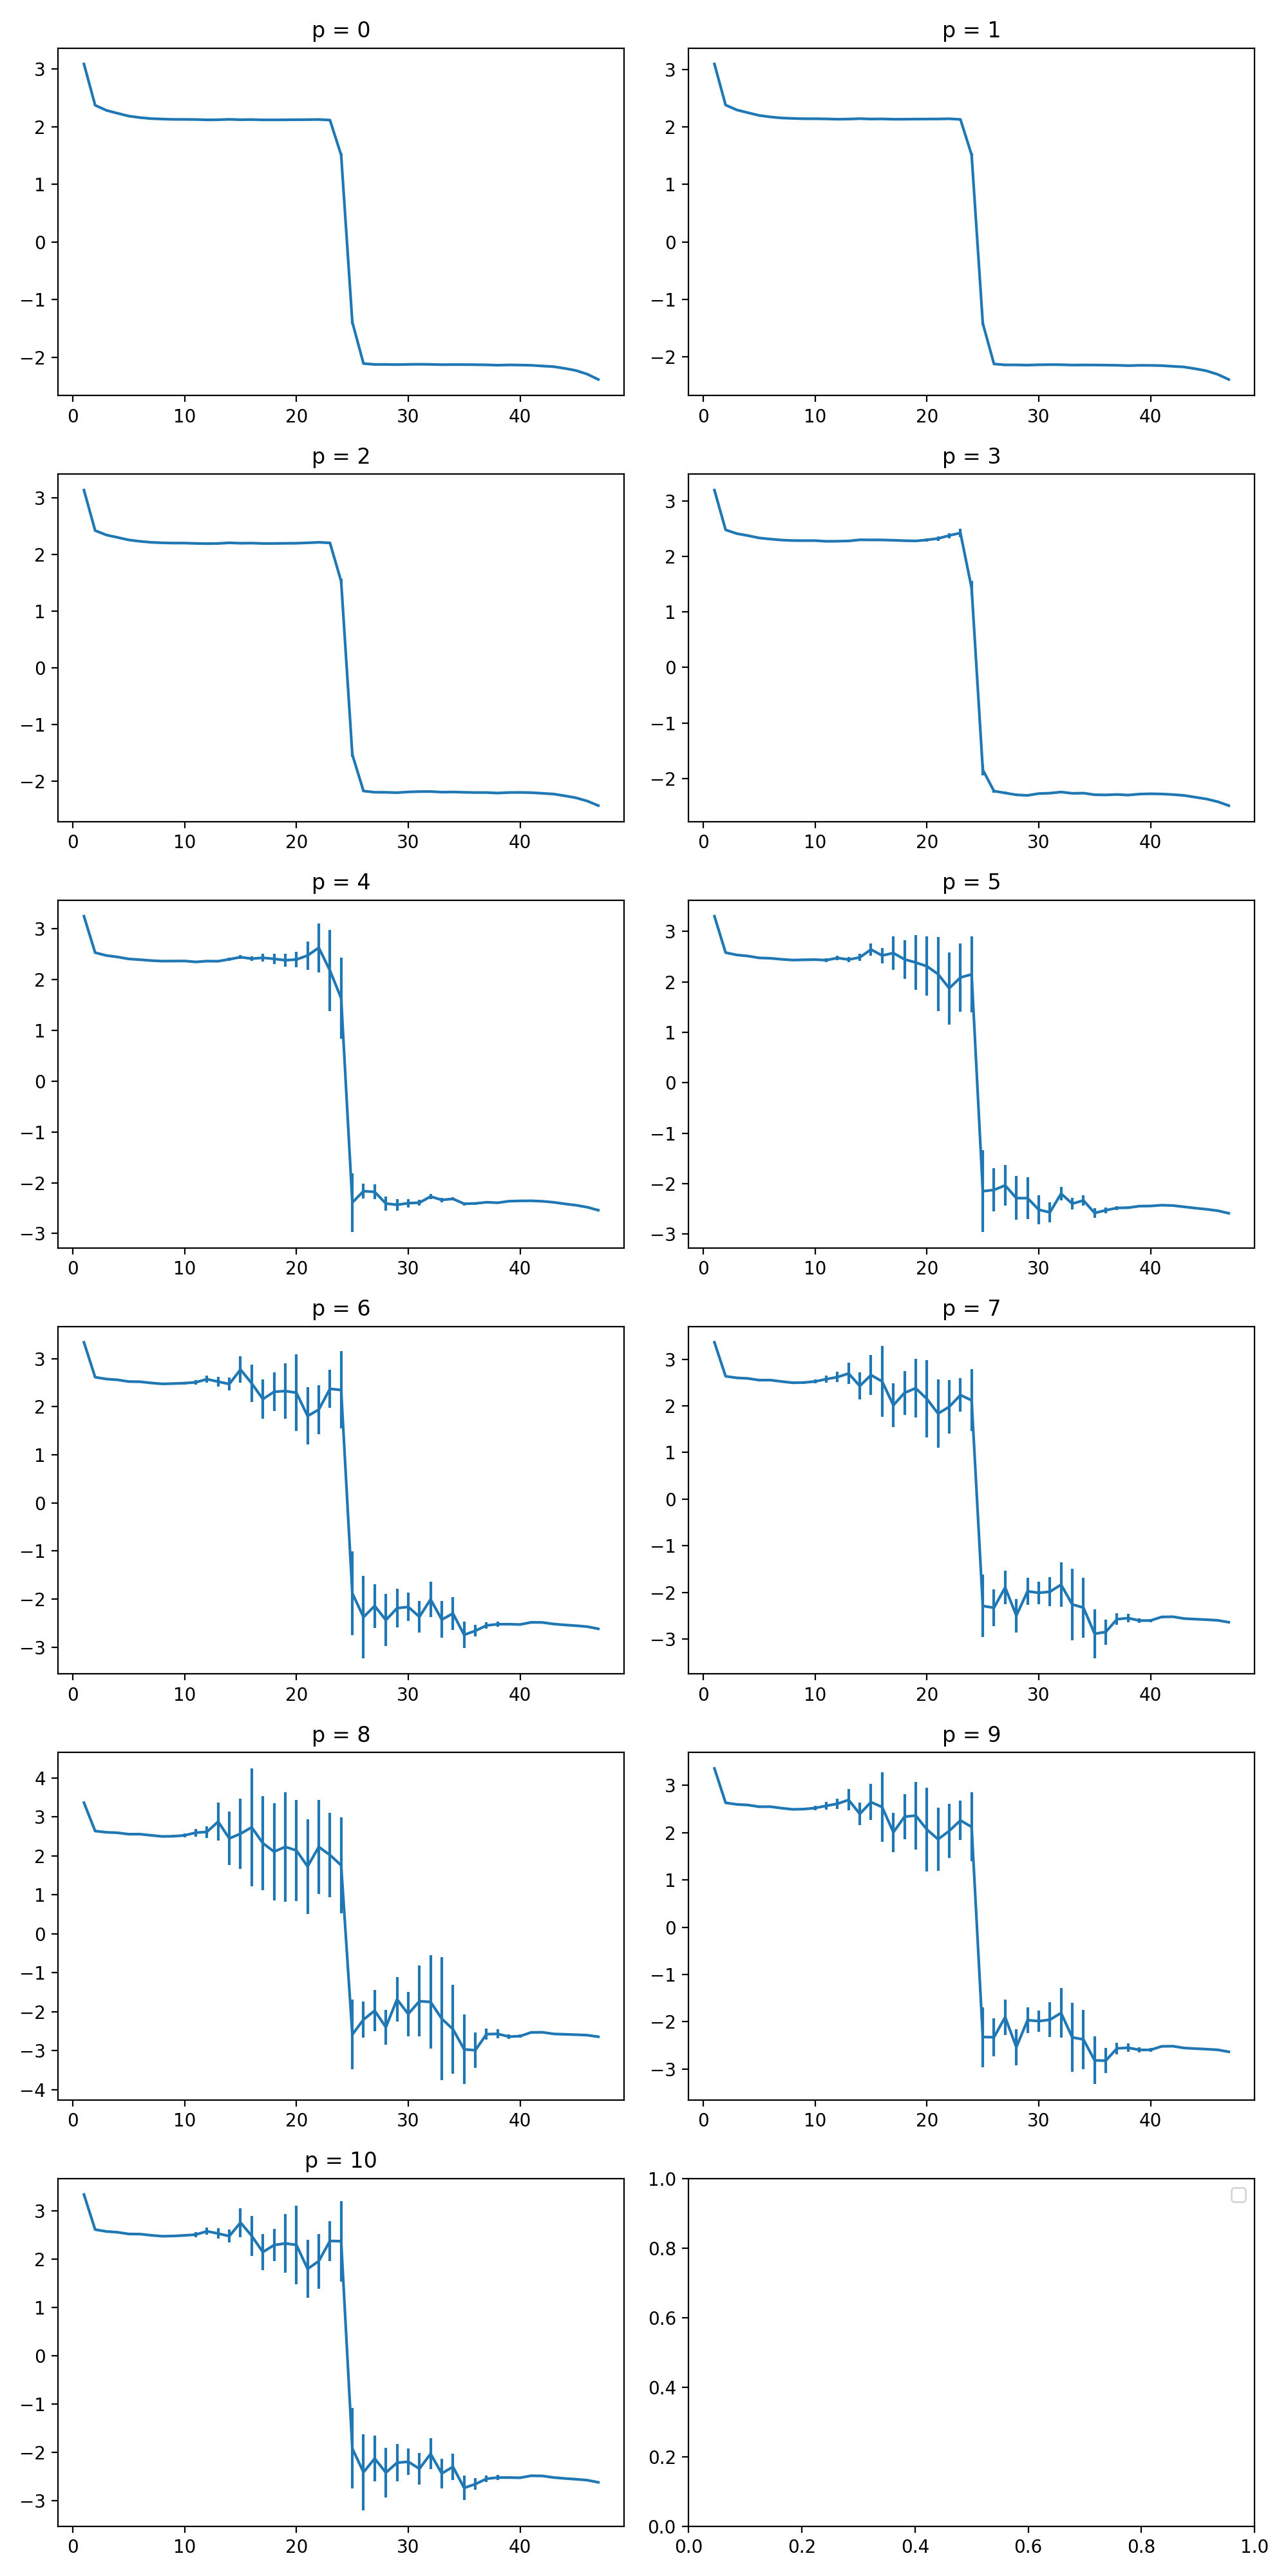

Computing for momentum = 0
Computing for momentum = 1
Computing for momentum = 2
Computing for momentum = 3
Computing for momentum = 4
Computing for momentum = 5
Computing for momentum = 6
Computing for momentum = 7
Computing for momentum = 8


/Users/theoares/lqcd/pion_mass/analysis.py:89: RuntimeWarning: overflow encountered in cosh
  m = root(lambda m : ratios[ens_idx, t] - np.cosh(m * (t - N / 2)) / np.cosh(m * (t + 1 - N / 2)), \
/Users/theoares/lqcd/pion_mass/analysis.py:89: RuntimeWarning: invalid value encountered in true_divide
  m = root(lambda m : ratios[ens_idx, t] - np.cosh(m * (t - N / 2)) / np.cosh(m * (t + 1 - N / 2)), \


Computing for momentum = 9
Computing for momentum = 10


No handles with labels found to put in legend.


In [3]:
f, ax = plt.subplots(6, 2, figsize = (10, 20))
ax = ax.flatten()
idx = 0
p_lat = np.sort([x for x in C.keys()])
energies = []
σ_energies = []
for p in p_lat:
    correlator = C[p]
    print('Computing for momentum = ' + str(p))
    num_configs = correlator.shape[0]
    n_t = correlator.shape[1]
    samples = analysis.bootstrap(correlator)
    ensemble_avg = np.mean(samples, axis = 1)
    μ_m_eff, σ_m_eff = analysis.get_effective_mass(ensemble_avg)
    μ_cosh, σ_cosh = analysis.get_cosh_effective_mass(ensemble_avg)
    
    #fit_region = range(8, 40)
    fit_region = range(10, 20)
    #flipped = analysis.flip_half_data(μ_m_eff, n_t)
    flipped = analysis.flip_half_data(μ_cosh, n_t)
    E, σ_E = analysis.extract_mass(fit_region, flipped, σ_cosh)
    energies.append(E)
    σ_energies.append(σ_E)
    #energies.append(analysis.extract_mass(fit_region, flipped))
    
    #Plot each curve
    ax[idx].errorbar(range(1, n_t), μ_m_eff, yerr = σ_m_eff)
    #ax[idx].plot(range(1, n_t), μ_m_eff, 'r')
    #ax[idx].plot(range(1, n_t), μ_cosh, 'b')
    ax[idx].set_title('p = ' + str(p))
    idx = idx + 1
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
print(energies)
print(σ_energies)

[2.119651454259066, 2.1406496896125726, 2.19919281207341, 2.2864102340573993, 2.3958770039413646, 2.469816426148492, 2.4409969585078626, 2.431547446801668, 2.491301163240162, 2.426128437408184, 2.4411749931167344]
[0.006155737185903676, 0.006834355143044757, 0.0102751360530859, 0.02262991979040037, 0.06644297994667477, 0.1723825963529843, 0.2804006096424549, 0.38763103134169324, 0.6936227082330466, 0.38421271324490525, 0.2762206912092307]


<IPython.core.display.Javascript object>


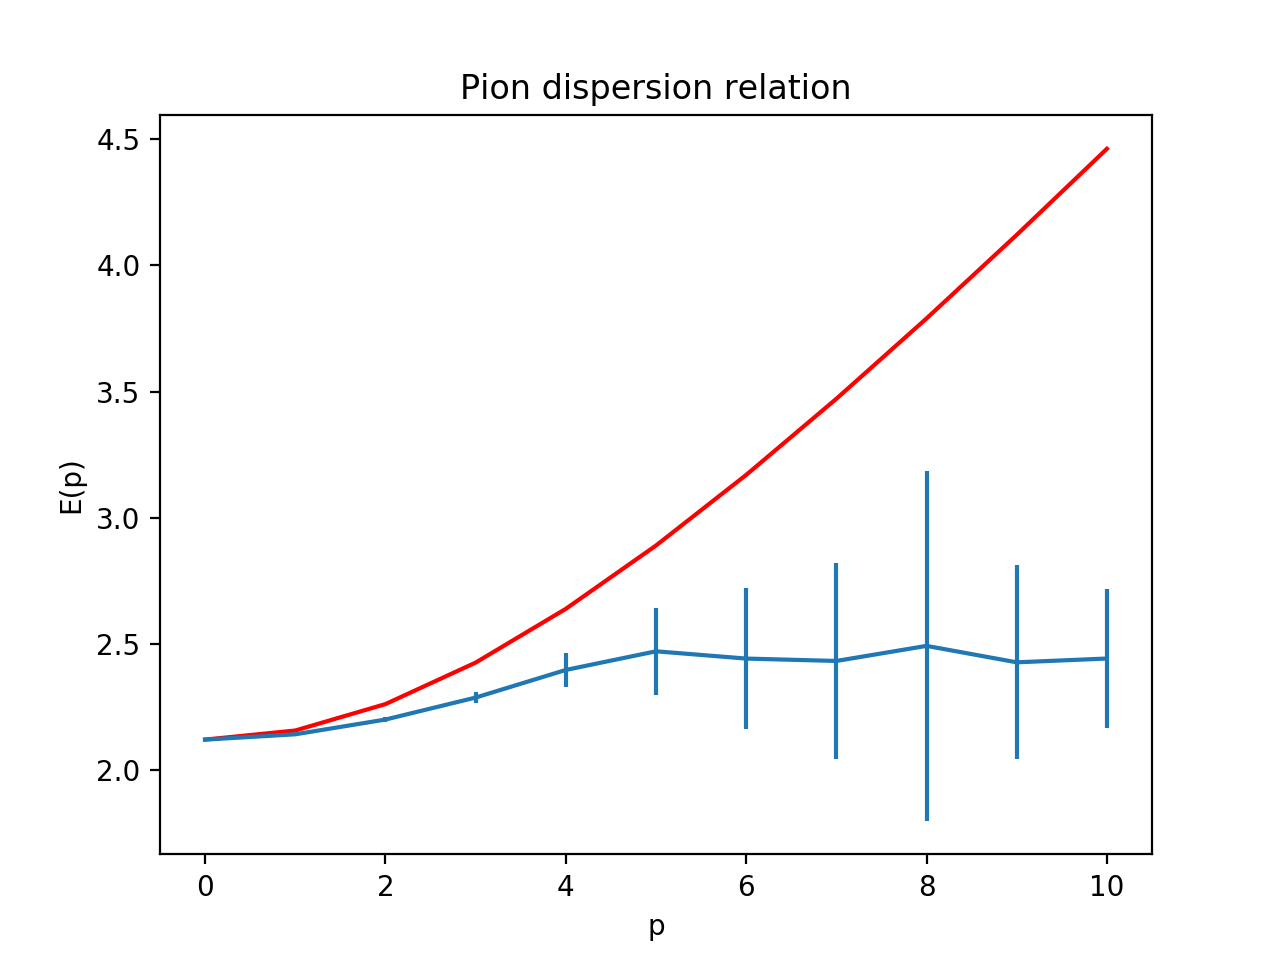

In [5]:
plt.figure()
plt.errorbar(p_lat, energies, σ_energies)
squared = np.multiply(p_lat, p_lat)
curve = np.sqrt(energies[0] ** 2 + ((2*np.pi / 16) **2) * squared)
plt.plot(p_lat, curve, 'r')
plt.title('Pion dispersion relation')
plt.ylabel('E(p)')
plt.xlabel('p')
plt.show()